In [43]:
import yaml
import pandas as pd
with open('config.yaml', 'r') as f:
    cfg = yaml.safe_load(f)
train_df = pd.read_csv(cfg['selary']['train_dataset'], low_memory=False)

In [8]:
from random import randrange
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [35]:
def dropping(train_df, colums):
    print(colums)
    for i in colums:
        train_df.drop(columns=[i], inplace=True)
    return train_df
#train_df = dropping(train_df, ['ID', 'Name', 'SSN', 'Customer_ID'])


['ID', 'Name', 'SSN', 'Customer_ID']


In [18]:
def label_incode(train_df):
    label_encoder = LabelEncoder()
    col = ['Occupation', 'Type_of_Loan', 'Month', 'Credit_Mix', 'Payment_Behaviour', 'Credit_Score', 'Payment_of_Min_Amount']
    for i in col:
        train_df[i] = pd.Series(label_encoder.fit_transform(train_df[i]))
    return train_df
label_encoderr = LabelEncoder()
#label_encoder = LabelEncoder()


In [37]:
def parse_data(value):
    if type(value) == float:
        return value
    else: return int(value.split(' ')[0]) *12 + int(value.split(' ')[3])
#train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(parse_data)

In [38]:
def convert_to_float_or_random(value):
    if type(value) == float:
        return value
    elif type(value) is int:
        return value
    elif value == '__10000__':
        return 11111111111111111
    elif value == "__-333333333333333333333333333__":
        return 33333333333333333
    elif value == '_':
        return 0
    elif value[-1] == '_':
        try: return float(value[0:-1])
        except ValueError:
            print(value)
            return value
    else:
        try:
            return float(value)
        except ValueError:
            print(value)
            return value
train_df[train_df.select_dtypes(include='object').columns] =train_df.select_dtypes(include=['object']).map(convert_to_float_or_random)

January
July
January
February
March
May
June
August
January
February
May
June
July
August
January
February
March
April
May
June
August
January
February
March
April
May
August
February
April
August
January
February
May
June
August
February
March
April
May
July
January
February
April
May
June
July
January
February
March
May
June
January
February
April
May
June
July
August
February
April
May
June
January
March
May
July
August
January
February
March
April
May
August
January
February
March
April
June
August
February
April
June
August
February
March
April
June
July
August
January
February
March
May
June
August
May
July
January
August
January
May
June
July
February
March
April
May
June
July
January
February
March
August
February
March
April
June
August
January
March
April
May
June
July
January
April
June
July
August
January
February
March
April
May
July
August
January
February
July
February
May
June
February
March
April
May
June
August
March
April
May
August
January
March
May
June
July
August

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Mortgage Loan, Credit-Builder Loan, Payday Loan, Payday Loan, Student Loan, Auto Loan, Home Equity Loan, and Auto Loan
Mortgage Loan, Credit-Builder Loan, Payday Loan, Payday Loan, Student Loan, Auto Loan, Home Equity Loan, and Auto Loan
Mortgage Loan, Credit-Builder Loan, Payday Loan, Payday Loan, Student Loan, Auto Loan, Home Equity Loan, and Auto Loan
Credit-Builder Loan, Payday Loan, Auto Loan, Mortgage Loan, Personal Loan, Personal Loan, Credit-Builder Loan, and Auto Loan
Credit-Builder Loan, Payday Loan, Auto Loan, Mortgage Loan, Personal Loan, Personal Loan, Credit-Builder Loan, and Auto Loan
Credit-Builder Loan, Payday Loan, Auto Loan, Mortgage Loan, Personal Loan, Personal Loan, Credit-Builder Loan, and Auto Loan
Credit-Builder Loan, Payday Loan, Auto Loan, Mortgage Loan, Personal Loan, Personal Loan, Credit-Builder Loan, and Auto Loan
Credit-Builder Loan, Payday Loan, Auto Loan, Mortgage Loan, Personal Loan, Personal Loan, Credit-Builder Loan, and Auto Loan
Credit-Builder Loa

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [21]:
from sklearn.model_selection import train_test_split
X = train_df
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

In [22]:
def salary (df):
    if df['Monthly_Inhand_Salary'].isnull().any():
        df['Monthly_Inhand_Salary'] = df['Annual_Income']/12
        return df
#X_train = salary(X_train)
#X_test = salary(X_test)

In [112]:
def mean_value(df, columns):
    for col in columns:
        X_train[col] = X_train[col].fillna(X_train[col].mean())
    return df
    

In [23]:
def drop_missing(train_df):
    num_сols_with_missing = [col for col in train_df.columns
                         if train_df[col].isnull().any()]
    train_df=train_df.dropna(subset=num_сols_with_missing)
    return train_df
#X_train = drop_missing(X_train)
#X_test = drop_missing(X_test)

In [162]:
train_df = pd.read_csv(cfg['selary']['train_dataset'], low_memory=False)

train_df = dropping(train_df, ['ID', 'Name', 'SSN', 'Customer_ID'])

train_df['Type_of_Loan'] = train_df['Type_of_Loan'].fillna("Not Specified")

train_df = label_incode(train_df)

train_df['Credit_History_Age'] = train_df['Credit_History_Age'].apply(parse_data)

train_df[train_df.select_dtypes(include='object').columns] =train_df.select_dtypes(include=['object']).map(convert_to_float_or_random)

train_df = salary(train_df)


from sklearn.model_selection import train_test_split
X = train_df
X_train, X_test = train_test_split(X,  test_size=0.2, random_state=42)

columns = ['Age', "Annual_Income", "Monthly_Inhand_Salary", 'Num_Bank_Accounts','Num_Credit_Card', "Changed_Credit_Limit", 'Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly',  'Total_EMI_per_month', 'Outstanding_Debt', "Monthly_Balance", "Delay_from_due_date" ]

for col in columns:
    X_train = X_train.drop(X_train[X_train[col] < -1].index)
    X_test = X_test.drop(X_test[X_test[col] < -1 ].index)


for col in columns:
    X_train = X_train.drop(X_train[X_train[col] > X_train[col].quantile(.95)].index)
    X_test = X_test.drop(X_test[X_test[col] > X_test[col].quantile(.95)].index)


X_train = mean_value(X_train, ['Num_of_Delayed_Payment','Amount_invested_monthly','Monthly_Balance', 'Credit_History_Age', 'Num_Credit_Inquiries'])
X_test = mean_value(X_test, ['Num_of_Delayed_Payment','Amount_invested_monthly','Monthly_Balance', 'Credit_History_Age', 'Num_Credit_Inquiries'])

X_train = drop_missing(X_train)
X_test = drop_missing(X_test)

['ID', 'Name', 'SSN', 'Customer_ID']
(100000, 24)
(80000, 24)
(74757, 24)
(38970, 24)


In [203]:
class HotEncode:
    def __init__(self, train_df):
        self.train_df = train_df

    def encoderr(self, odf):
        encoder = OneHotEncoder(sparse_output=False)
        df = odf.to_frame()
        encodedData = encoder.fit_transform(df)
        encoded_df = pd.DataFrame(encodedData, columns=encoder.get_feature_names_out(df.columns))
        self.train_df.drop(columns=[odf.name], inplace=True)
        self.train_df = pd.concat([self.train_df,encoded_df], axis=1)
        return self.train_df

encoder = HotEncode(train_df)

In [125]:
print(f"Размеры X_train и y_train: {X_train.shape}")
print(f"Размеры X_test и y_test: {X_test.shape}")

Размеры X_train и y_train: (38653, 24)
Размеры X_test и y_test: (7525, 24)


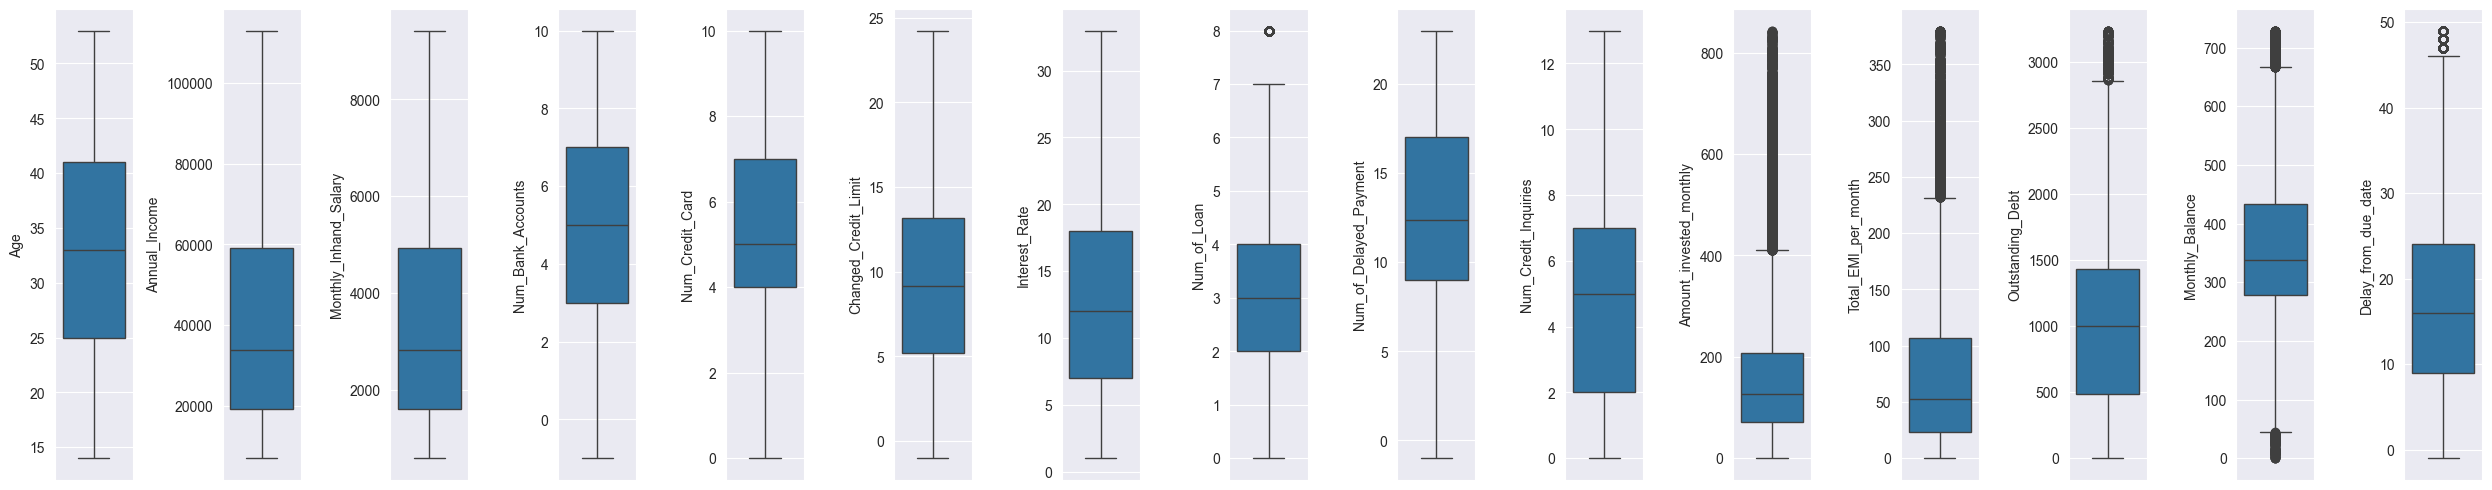

In [163]:
out_col = ['Age', "Annual_Income", "Monthly_Inhand_Salary", 'Num_Bank_Accounts','Num_Credit_Card', "Changed_Credit_Limit", 'Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly',  'Total_EMI_per_month', 'Outstanding_Debt', "Monthly_Balance", "Delay_from_due_date" ]
#out_col = X_train.columns.tolist()
fig, axes = plt.subplots(1, 15, figsize=(25, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=X_train[col], data=X_train, ax=ax)    
fig.tight_layout(pad=1)

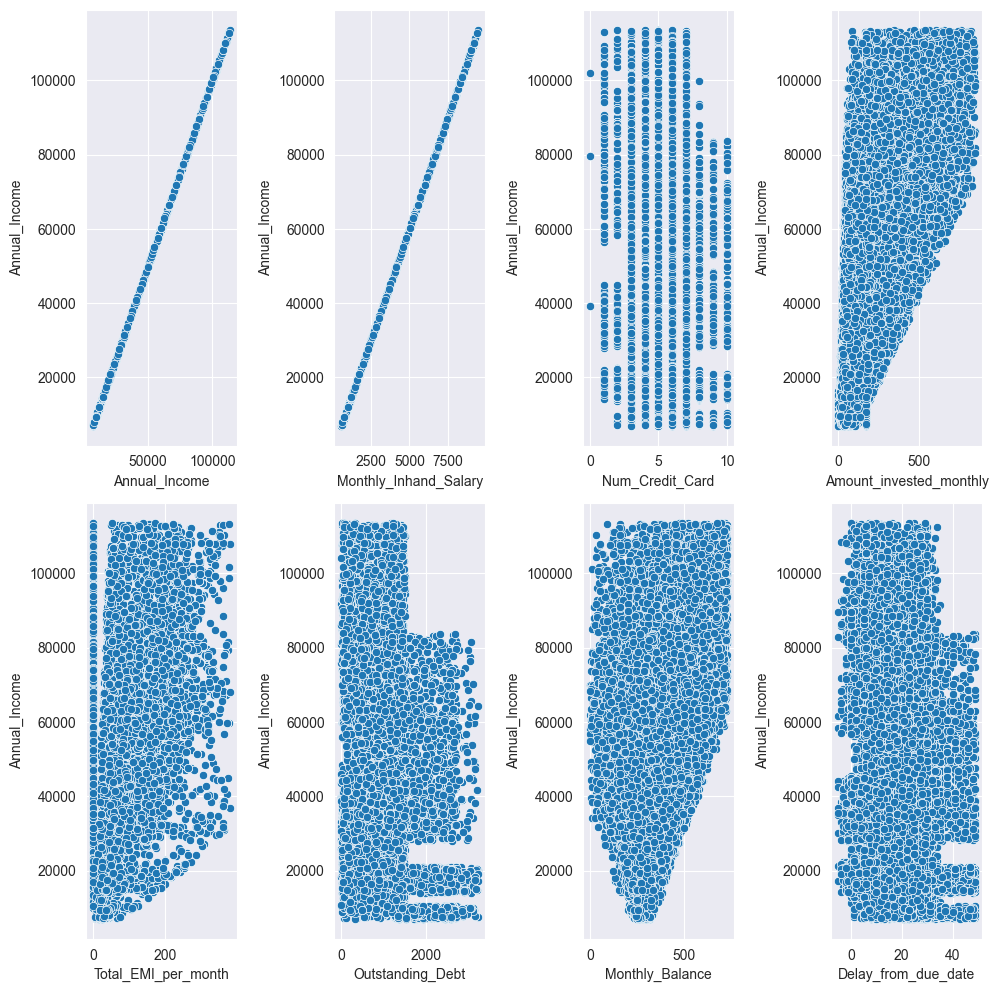

In [120]:
fig, axes = plt.subplots(2, 4, figsize=(10, 10))
out_col = [ "Annual_Income", "Monthly_Inhand_Salary", 'Num_Credit_Card', 'Amount_invested_monthly',  'Total_EMI_per_month', 'Outstanding_Debt', "Monthly_Balance", "Delay_from_due_date" ]
axes_flattened = axes.reshape(-1)
for i in range(len(out_col)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=out_col[i],
        y='Annual_Income',
        data=X_train,
        ax=ax,
    )
fig.tight_layout(pad=1.0)

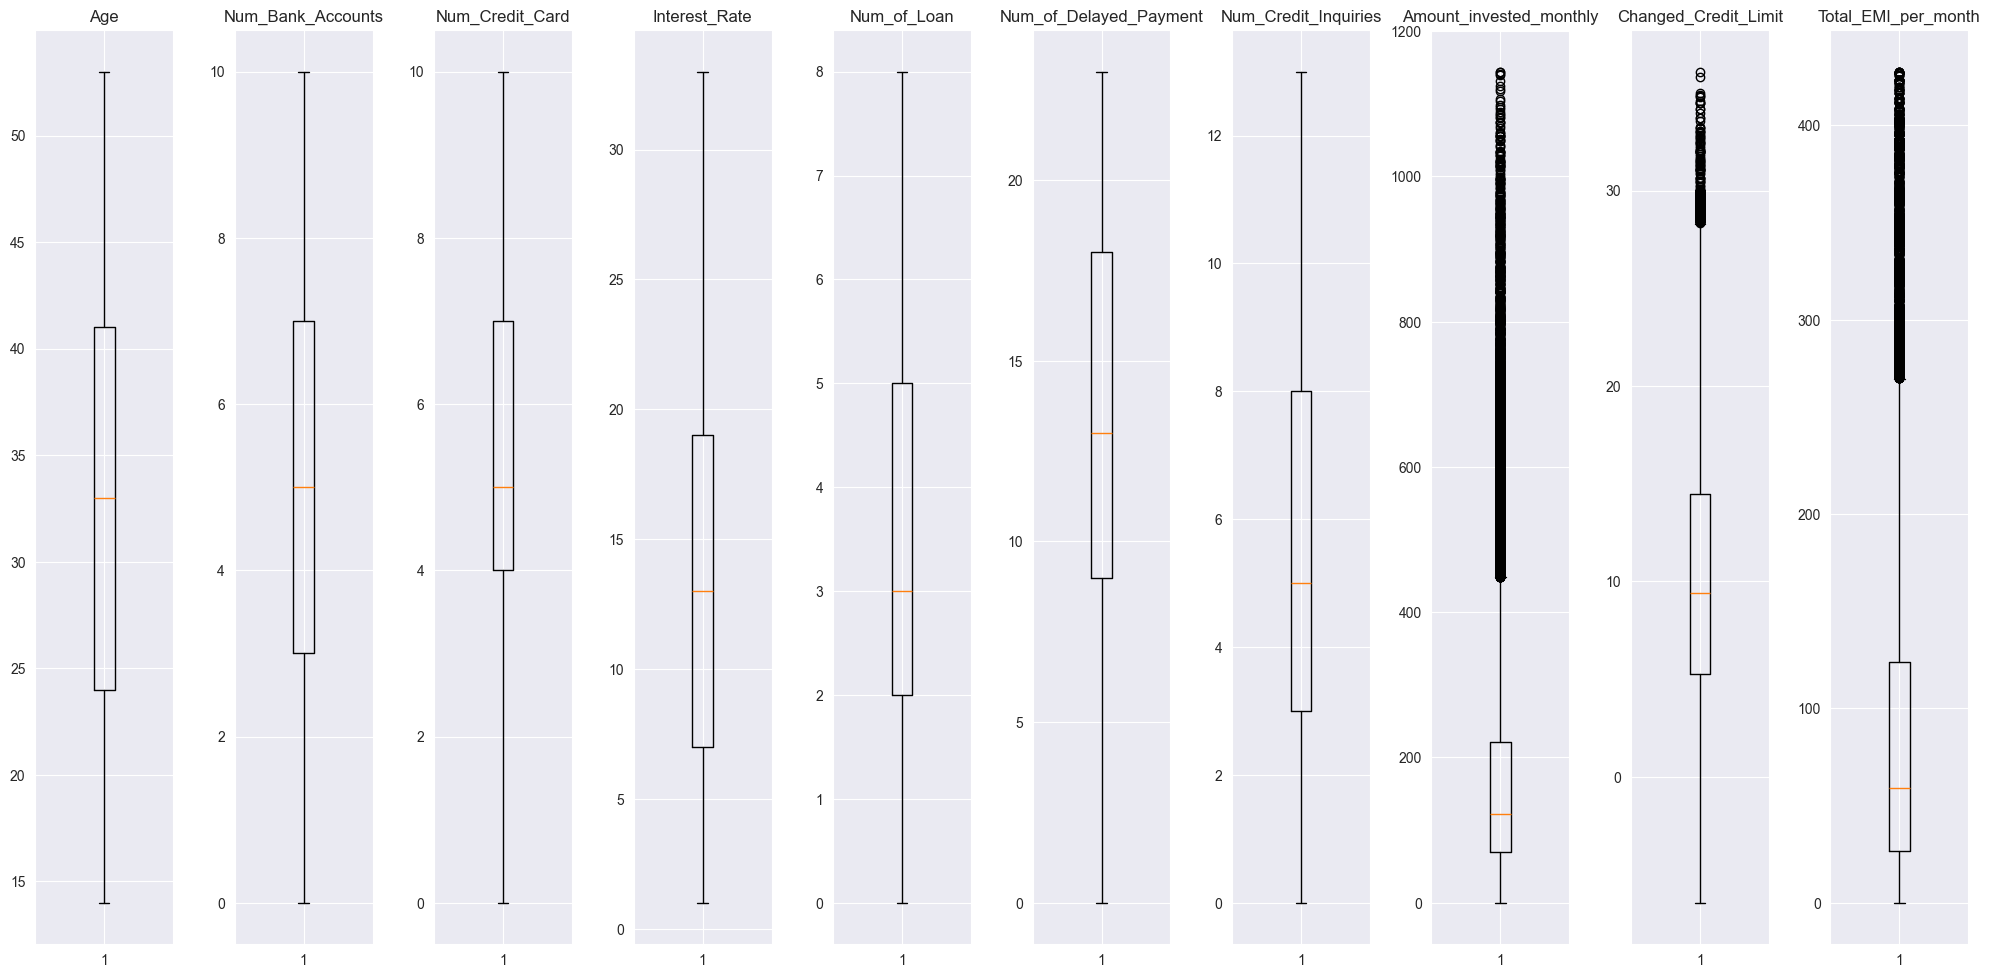

In [53]:
out_col = ['Age', 'Num_Bank_Accounts','Num_Credit_Card', 'Interest_Rate','Num_of_Loan','Num_of_Delayed_Payment','Num_Credit_Inquiries','Amount_invested_monthly', 'Changed_Credit_Limit', 'Total_EMI_per_month' ]
fig, axes = plt.subplots(1, 10, figsize=(20, 10))

for ax, col in zip(axes, out_col):
    ax.boxplot(X_train[col], vert = True)
    ax.set_title(col)  
fig.tight_layout(pad=1.5)
plt.show()

In [52]:
bins = [0, 1000, 2000, 3000, 4000, 5000,6000,7000,8000, 10000]
lab  = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-6000', '6000-7000', '7000-8000', '8000-10000']
train_df['Interval'] = pd.cut(train_df['Monthly_Inhand_Salary'], bins=bins, labels=lab)
occupation_group = train_df.groupby('Interval', observed=False)
salary_in = (
    occupation_group['Amount_invested_monthly'].mean().reset_index(name = 'Anual_mean')
)

(train_df['Interval'].value_counts())

Interval
1000-2000     21147
2000-3000     13264
3000-4000      9669
5000-6000      6847
0-1000         6724
4000-5000      6369
8000-10000     5565
6000-7000      5374
7000-8000      3797
Name: count, dtype: int64

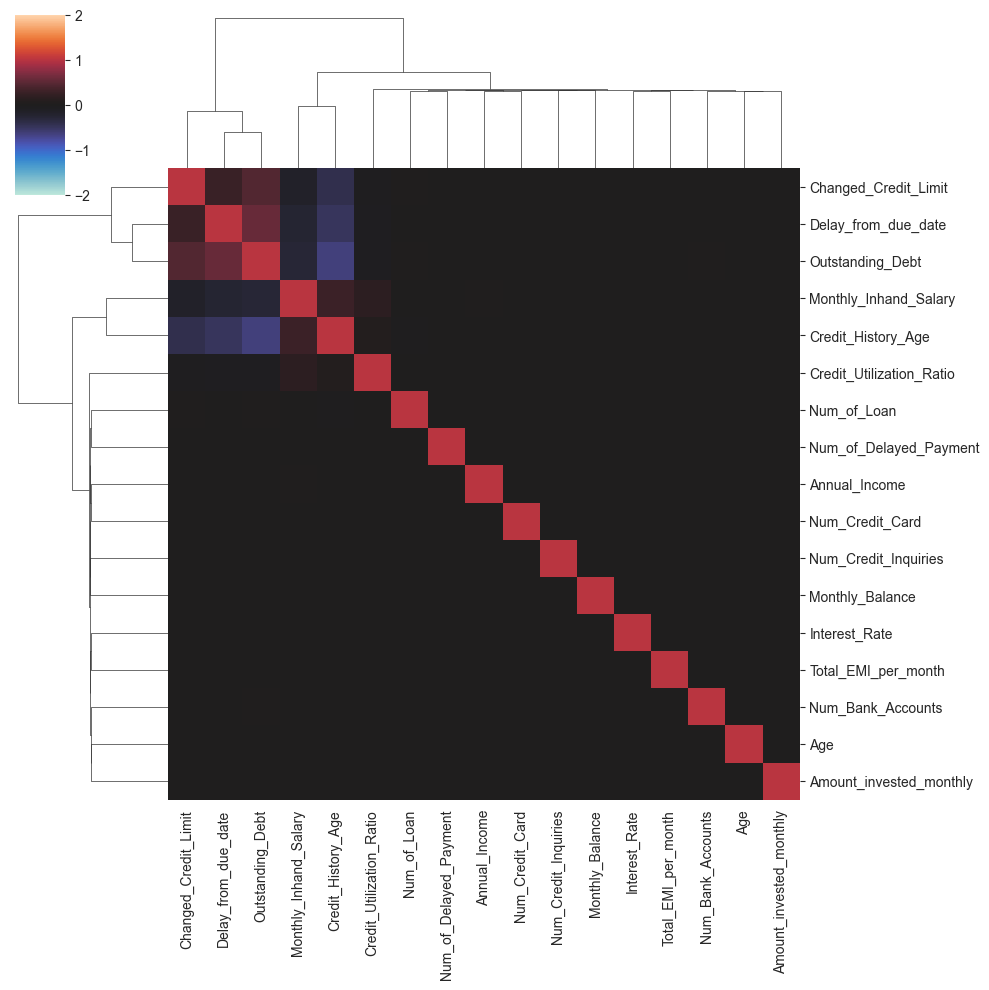

In [41]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-2.0,
        vmax=2.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )

corrplot(train_df.select_dtypes(exclude='object'), annot=None)


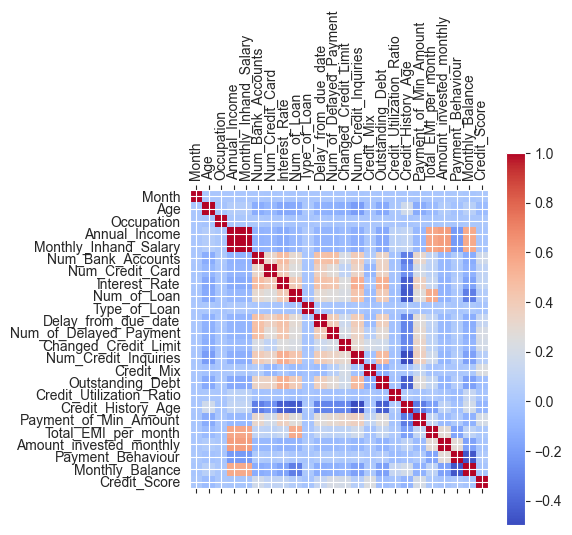

In [165]:
cor_mat = X_train.corr()
plt.matshow(cor_mat, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(cor_mat)), cor_mat.columns, rotation=90)
plt.yticks(range(len(cor_mat)), cor_mat.columns)


In [157]:
X_train.to_csv(r'D:\study\AI\PredictCreditScoreinit\train_3.csv', header=True, index=True)
X_test.to_csv(r'D:\study\AI\PredictCreditScoreinit\test_3.csv', header=True, index=True)